In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

In [9]:
from scipy import stats

In [10]:
from tabulate import tabulate

In [11]:
import statsmodels.api as sm

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [80]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [81]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [82]:
# personal injusry presence
acv = acv.assign(inp = 1)
acv.loc[(acv['SV'] == 0) & (acv['LV'] == 0), 'inp'] = 0

In [83]:
print(acv.columns.values)

['Nr' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [84]:
print(rpv.columns.values)

['id' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_qnr_34' 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6'
 'z_knr_7' 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12'
 'trafficarea_1' 'trafficarea_2

In [85]:
acv.groupby(['svp']).size()

svp
0    246
1     49
dtype: int64

### Regression

In [86]:
# Remove 'd_bicyclecount' 'd_carcount''droad_sl'
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

In [87]:
len(cn)

98

In [88]:
from statsmodels.gam.api import GLMGam, BSplines

In [89]:
# pip install pygam
import pygam

In [226]:
# y1 = acv['svp']
# x = acv[cn]
gamtry = pygam.LinearGAM(s(0, n_splines=1) + s(1) + s(2)).fit(x, y1)
# gamtr = pygam.LinearGAM(nsplines = 1).fit(x, y1)

NameError: name 's' is not defined

In [90]:
y1 = acv['svp']
x = acv[cn]
gam1 = pygam.LinearGAM().fit(x, y1)

In [91]:
gam1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                  -377.0746
Number of Samples:                          295 AIC:                                              1006.982
                                                AICc:                                            1199.2146
                                                GCV:                                                0.3974
                                                Scale:                                              0.1133
                                                Pseudo R-Squared:                                   0.5298
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/1772604297.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam1.summary()


In [214]:
len(gam1.coef_)

1961

In [202]:
gam1.statistics_['cov']

array([[ 8.23422802e-06,  3.86043215e-05,  7.52034764e-06, ...,
        -1.79406428e-06,  1.19308057e-07, -9.08621927e-07],
       [ 3.86043215e-05,  1.97459346e-04,  3.18958318e-05, ...,
        -1.32329546e-05,  1.17004501e-06, -5.95670759e-06],
       [ 7.52034764e-06,  3.18958318e-05,  7.60032981e-06, ...,
        -7.22099095e-07, -4.96634176e-08, -5.35875938e-07],
       ...,
       [-1.79406428e-06, -1.32329546e-05, -7.22099095e-07, ...,
         1.50455315e-04,  1.10669006e-06, -1.09900209e-06],
       [ 1.19308057e-07,  1.17004501e-06, -4.96634176e-08, ...,
         1.10669006e-06,  3.38113346e-06,  2.61465444e-08],
       [-9.08621927e-07, -5.95670759e-06, -5.35875938e-07, ...,
        -1.09900209e-06,  2.61465444e-08,  3.59495917e-06]])

In [93]:
gam1.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [188]:
gam1.logs_

defaultdict(list,
            {'deviance': [48.9998554295761, 19.21251527578898],
             'diffs': [0.9999999850345022, 0.0]})

In [194]:
cnlist = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount', 'intercept']

In [215]:
df1 = pd.DataFrame()
df1['feature'] = cnlist
# df1['coef'] = gam1.coef_
df1['svp_pv'] = gam1.statistics_['p_values']

In [224]:
gam1.coef_.shape

(1961,)

In [227]:
gam1.get_params(deep=False)

{'scale': None,
 'max_iter': 100,
 'tol': 0.0001,
 'callbacks': [Deviance(), Diffs()],
 'verbose': False,
 'terms': s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + s(74) + s(75) + s(76) + s(77) + s(78) + s(79) + s(80) + s(81) + s(82) + s(83) + s(84) + s(85) + s(86) + s(87) + s(88) + s(89) + s(90) + s(91) + s(92) + s(93) + s(94) + s(95) + s(96) + s(97) + intercept,
 'fit_intercept': True}

In [213]:
# df1.to_csv('/home/yelhe/script/mt/model/gam_1p.csv', index = False)

In [95]:
xrp = rpv[cn]

In [96]:
gam_svp = gam1.predict(xrp)

(array([  9.,  42.,  72., 149., 206., 146.,  98.,  40.,  24.,   6.]),
 array([-0.33064912, -0.22478635, -0.11892358, -0.01306081,  0.09280196,
         0.19866473,  0.3045275 ,  0.41039027,  0.51625304,  0.62211581,
         0.72797858]),
 <BarContainer object of 10 artists>)

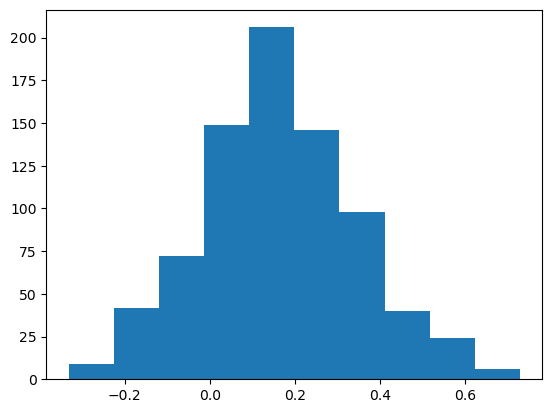

In [97]:
plt.hist(gam_svp)

In [98]:
y2 = acv['lvp']
x = acv[cn]
gam2 = pygam.LinearGAM().fit(x, y2)

In [99]:
gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                  -243.2087
Number of Samples:                          295 AIC:                                              739.2502
                                                AICc:                                             931.4828
                                                GCV:                                                0.6083
                                                Scale:                                              0.1734
                                                Pseudo R-Squared:                                    0.507
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/263715579.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


In [100]:
gam2.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [216]:
df1['lvp_pv'] = gam2.statistics_['p_values']

In [101]:
gam_lvp = gam2.predict(xrp)

(array([ 11.,  18.,  43.,  89., 145., 186., 151., 112.,  28.,   9.]),
 array([0.04720431, 0.16477883, 0.28235334, 0.39992785, 0.51750236,
        0.63507687, 0.75265139, 0.8702259 , 0.98780041, 1.10537492,
        1.22294944]),
 <BarContainer object of 10 artists>)

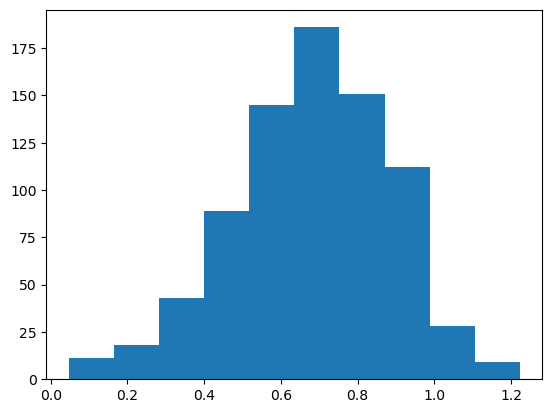

In [102]:
plt.hist(gam_lvp)

In [103]:
y3 = acv['pdp']
x = acv[cn]
gam3 = pygam.LinearGAM().fit(x, y3)

In [104]:
gam3.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                  -233.1703
Number of Samples:                          295 AIC:                                              719.1733
                                                AICc:                                             911.4059
                                                GCV:                                                 0.643
                                                Scale:                                              0.1833
                                                Pseudo R-Squared:                                   0.5785
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/3847374921.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam3.summary()


In [105]:
gam3.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [217]:
df1['pdp_pv'] = gam3.statistics_['p_values']

In [106]:
gam_pdp = gam3.predict(xrp)

(array([  5.,  15.,  57., 115., 157., 184., 134.,  80.,  33.,  12.]),
 array([-0.15171549, -0.00450098,  0.14271352,  0.28992802,  0.43714253,
         0.58435703,  0.73157154,  0.87878604,  1.02600055,  1.17321505,
         1.32042956]),
 <BarContainer object of 10 artists>)

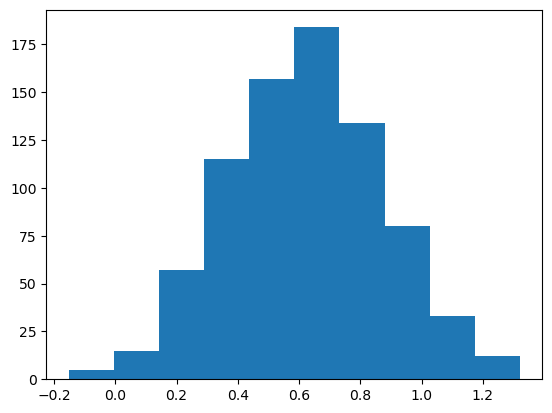

In [107]:
plt.hist(gam_pdp)

In [108]:
y4 = acv['inp']
x = acv[cn]
gam4 = pygam.LinearGAM().fit(x, y4)

In [109]:
gam4.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                  -486.1253
Number of Samples:                          295 AIC:                                             1225.0833
                                                AICc:                                            1417.3159
                                                GCV:                                                0.3242
                                                Scale:                                              0.0924
                                                Pseudo R-Squared:                                   0.5468
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/3649765879.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam4.summary()


In [110]:
gam4.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [218]:
df1['inp_pv'] = gam4.statistics_['p_values']

In [111]:
gam_inp = gam4.predict(xrp)

(array([  9.,  34.,  68., 140., 195., 178.,  94.,  53.,  15.,   6.]),
 array([0.36320933, 0.46054499, 0.55788065, 0.65521631, 0.75255197,
        0.84988763, 0.94722329, 1.04455895, 1.14189461, 1.23923027,
        1.33656592]),
 <BarContainer object of 10 artists>)

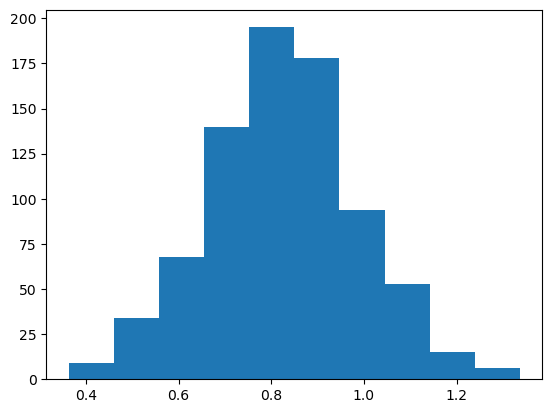

In [112]:
plt.hist(gam_inp)

In [170]:
y5 = acv['SV']
x = acv[cn]
gam5 = pygam.LinearGAM().fit(x, y5)

In [171]:
gam5.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                  -377.0746
Number of Samples:                          295 AIC:                                              1006.982
                                                AICc:                                            1199.2146
                                                GCV:                                                0.3974
                                                Scale:                                              0.1133
                                                Pseudo R-Squared:                                   0.5298
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/2924336984.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam5.summary()


In [172]:
gam5.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [219]:
df1['sv_pv'] = gam5.statistics_['p_values']

In [173]:
gam_sv = gam5.predict(xrp)

(array([  9.,  42.,  72., 149., 206., 146.,  98.,  40.,  24.,   6.]),
 array([-0.33064912, -0.22478635, -0.11892358, -0.01306081,  0.09280196,
         0.19866473,  0.3045275 ,  0.41039027,  0.51625304,  0.62211581,
         0.72797858]),
 <BarContainer object of 10 artists>)

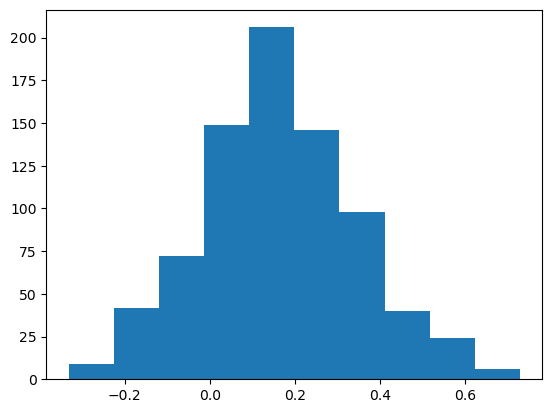

In [174]:
plt.hist(gam_sv)

In [175]:
y6 = acv['LV']
x = acv[cn]
gam6 = pygam.LinearGAM().fit(x, y6)

In [176]:
gam6.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                  -202.0216
Number of Samples:                          295 AIC:                                              656.8759
                                                AICc:                                             849.1085
                                                GCV:                                                0.8636
                                                Scale:                                              0.2462
                                                Pseudo R-Squared:                                   0.5102
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/2608025491.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam6.summary()


In [177]:
gam6.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [220]:
df1['lv_pv'] = gam6.statistics_['p_values']

In [178]:
gam_lv = gam6.predict(xrp)

(array([  1.,   6.,  27.,  56., 138., 179., 206., 118.,  56.,   5.]),
 array([-0.17956281, -0.02281402,  0.13393476,  0.29068354,  0.44743233,
         0.60418111,  0.7609299 ,  0.91767868,  1.07442746,  1.23117625,
         1.38792503]),
 <BarContainer object of 10 artists>)

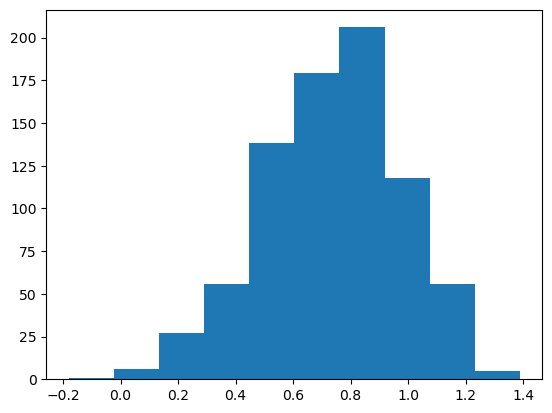

In [179]:
plt.hist(gam_lv)

In [123]:
y7 = acv['pd']
x = acv[cn]
gam7 = pygam.LinearGAM().fit(x, y7)

In [124]:
gam7.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.4164
Link Function:                     IdentityLink Log Likelihood:                                 -5019.5497
Number of Samples:                          295 AIC:                                            10291.9322
                                                AICc:                                           10484.1648
                                                GCV:                                         34331076.4761
                                                Scale:                                        9786204.9232
                                                Pseudo R-Squared:                                   0.5211
Feature Function                  Lam

/sctmp/yelhe/ipykernel_4188251/710967099.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam7.summary()


In [125]:
gam7.statistics_

{'n_samples': 295,
 'm_features': 98,
 'edof_per_coef': array([0.99549741, 0.50953153, 0.61150435, 0.55031447, 0.44797126,
        0.35411097, 0.45362347, 0.44928155, 0.51090971, 0.55329826,
        0.44678193, 0.42158071, 0.43834499, 0.39666791, 0.44064081,
        0.38863148, 0.46086998, 0.96380308, 0.33366173, 0.37977304,
        0.50415413, 0.48442697, 0.61137356, 0.64796018, 0.65417891,
        0.70161761, 0.72972482, 0.73850194, 0.68283252, 0.73540747,
        0.70510137, 0.7539453 , 0.73031977, 0.73213768, 0.73086819,
        0.68666581, 0.54235408, 0.45176094, 0.45150703, 0.4219329 ,
        0.43417556, 0.40427349, 0.50678766, 0.52401196, 0.52786159,
        0.59968584, 0.64569349, 0.60504137, 0.63345018, 0.66667505,
        0.63048235, 0.6691811 , 0.57670349, 0.47832733, 0.45782064,
        0.46486726, 0.52646709, 0.37493441, 0.40844174, 0.38940821,
        0.40607499, 0.44412588, 0.38551939, 0.49820396, 0.52901616,
        0.51386124, 0.53082236, 0.5690693 , 0.54437554, 0.541

In [221]:
df1['pd_pv'] = gam7.statistics_['p_values']

In [126]:
gam_pd = gam7.predict(xrp)

(array([ 11.,  39., 126., 189., 201., 133.,  62.,  17.,  10.,   4.]),
 array([-2939.18285919, -1732.05027039,  -524.91768159,   682.21490721,
         1889.34749601,  3096.48008481,  4303.61267361,  5510.74526241,
         6717.87785121,  7925.01044001,  9132.14302881]),
 <BarContainer object of 10 artists>)

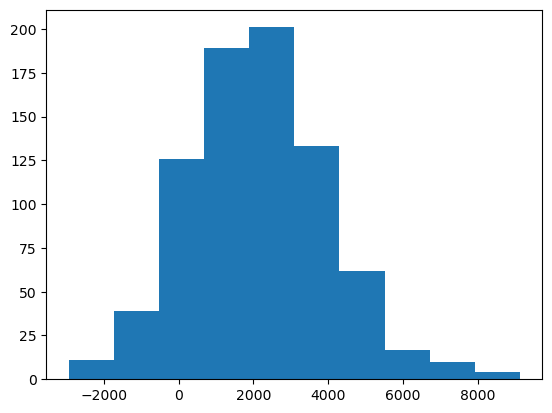

In [127]:
plt.hist(gam_pd)

In [129]:
rpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Columns: 111 entries, id to speedlimit_7
dtypes: float64(35), int64(74), object(2)
memory usage: 686.9+ KB


In [133]:
gam_pm = rpv.copy(deep = True)

In [134]:
gam_pm['gam_svp'] = gam_svp
gam_pm['gam_lvp'] = gam_lvp
gam_pm['gam_pdp'] = gam_pdp
gam_pm['gam_inp'] = gam_inp
gam_pm['gam_sv'] = gam_sv
gam_pm['gam_lv'] = gam_lv
gam_pm['gam_pd'] = gam_pd


In [143]:
print(gam_pm.columns)

Index(['id', 'droad_sl', 'd_bicyclecount', 'd_carcount', 'curbtype', 'z_qnr',
       'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit',
       'z_qnr_34', 'speedlimit_7', 'gam_svp', 'gam_lvp', 'gam_pdp', 'gam_inp',
       'gam_sv', 'gam_lv', 'gam_pd'],
      dtype='object')


In [140]:
gam_pm = gam_pm.drop(cn,axis = 1)

In [145]:
gam_pm = gam_pm.drop(['droad_sl', 'd_bicyclecount', 'd_carcount', 'curbtype', 'z_qnr',
       'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit',
       'z_qnr_34', 'speedlimit_7'],axis = 1)

In [146]:
gam_pm

,id,gam_svp,gam_lvp,gam_pdp,gam_inp,gam_sv,gam_lv,gam_pd
0,2,0.540881,0.474677,0.638950,0.942768,0.540881,0.455222,1463.787727
1,3,0.533967,0.248310,0.758159,0.696598,0.533967,0.186381,2862.632534
2,4,0.164547,0.496539,0.787128,0.660074,0.164547,0.627956,3833.614589
3,5,-0.134927,0.686266,1.067724,0.543762,-0.134927,0.935444,7506.480942
4,6,-0.004161,0.565394,0.568908,0.571763,-0.004161,0.740449,2909.974094
...,...,...,...,...,...,...,...,...
787,990,0.360266,0.759869,0.159742,1.095360,0.360266,0.717629,-1201.937955
788,991,0.354543,0.753896,0.402067,1.045267,0.354543,0.869812,2018.121258
789,992,0.077771,0.901510,0.137180,1.083337,0.077771,0.882601,1099.525701
790,993,0.134090,0.806257,0.205953,0.944846,0.134090,0.882591,-2374.647033


(array([ 11.,  39., 126., 189., 201., 133.,  62.,  17.,  10.,   4.]),
 array([-2939.18285919, -1732.05027039,  -524.91768159,   682.21490721,
         1889.34749601,  3096.48008481,  4303.61267361,  5510.74526241,
         6717.87785121,  7925.01044001,  9132.14302881]),
 <BarContainer object of 10 artists>)

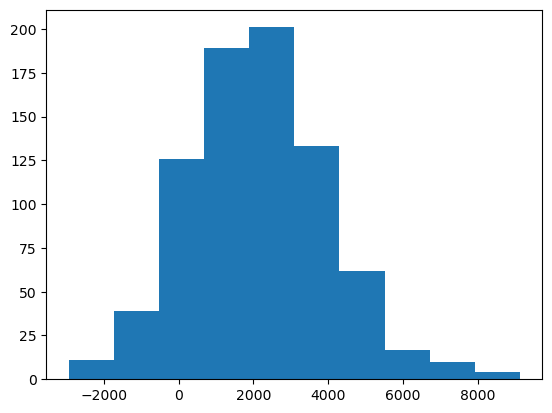

In [169]:
plt.hist(gam_pm['gam_pd'])

In [152]:
gam_r = gam_pm.copy(deep = True)

gam_r['svpc'] = gam_r['gam_svp'].round()
gam_r['lvpc'] = gam_r['gam_lvp'].round()
gam_r['pdpc'] = gam_r['gam_pdp'].round()
gam_r['inpc'] = gam_r['gam_inp'].round()
gam_r['svn'] = gam_r['gam_sv'].round()
gam_r['lvn'] = gam_r['gam_lv'].round()
gam_r['pdn'] = gam_r['gam_pd'].round()

gam_r.loc[gam_r['svpc']< 0,'svpc']=0
gam_r.loc[gam_r['lvpc']< 0,'lvpc']=0
gam_r.loc[gam_r['pdpc']< 0,'pdpc']=0
gam_r.loc[gam_r['inpc']< 0,'inpc']=0
gam_r.loc[gam_r['svn']< 0,'svn']=0
gam_r.loc[gam_r['lvn']< 0,'lvn']=0
gam_r.loc[gam_r['pdn']< 0,'pdn']=0
# rf_ols_c.loc[rf_ols_c['olvpc']< 0,'olvpc']=0
# rf_ols_c.loc[rf_ols_c['opdpc']< 0,'opdpc']=0
# rf_ols_c.loc[rf_ols_c['osvc']< 0,'osvc']=0
# rf_ols_c.loc[rf_ols_c['olvc']< 0,'olvc']=0
# rf_ols_c.loc[rf_ols_c['oinpc']< 0,'oinpc']=0


(array([143.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 649.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

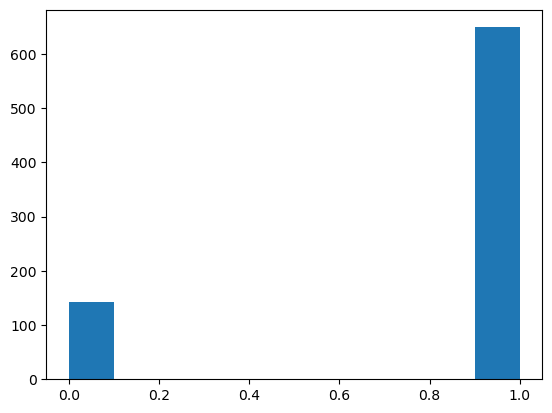

In [182]:
plt.hist(gam_r['lv'])


(array([133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 659.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

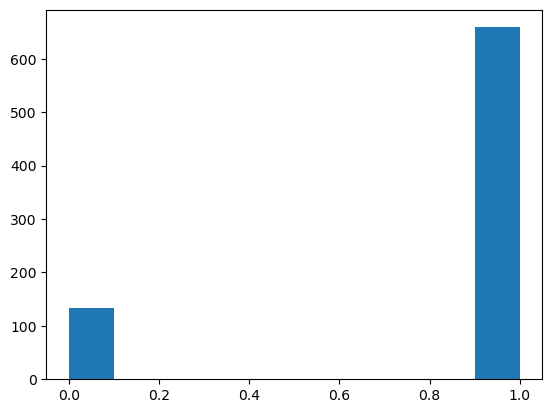

In [183]:
plt.hist(gam_r['lv'])


In [212]:
gam_r.to_csv('/home/yelhe/script/mt/model/gam_result.csv', index = False)

In [211]:
gam_r.columns

Index(['id', 'gam_svp', 'gam_lvp', 'gam_pdp', 'gam_inp', 'gam_sv', 'gam_lv',
       'gam_pd', 'svpc', 'lvpc', 'pdpc', 'inpc', 'svn', 'lvn', 'pdn'],
      dtype='object')

In [222]:
df1.to_csv('/home/yelhe/script/mt/model/gam_pv.csv', index = False)

In [228]:
gam_r['gam_lvp']

0      0.474677
1      0.248310
2      0.496539
3      0.686266
4      0.565394
         ...   
787    0.759869
788    0.753896
789    0.901510
790    0.806257
791    0.922581
Name: gam_lvp, Length: 792, dtype: float64

In [233]:
gam_r.groupby(['pdpc']).size()

pdpc
0.0    246
1.0    546
dtype: int64